In [1]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import joblib


In [2]:
# Path to processed data
data_path = '../processed_data'  # Adjust path if necessary

# Load data
X_train = np.load(f'{data_path}/X_train_features.npy')
X_test = np.load(f'{data_path}/X_test_features.npy')
y_train = np.load(f'{data_path}/y_train.npy')
y_test = np.load(f'{data_path}/y_test.npy')

print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test labels shape: {y_test.shape}")


Training data shape: (6384, 360)
Test data shape: (2736, 360)
Training labels shape: (6384,)
Test labels shape: (2736,)


In [3]:
# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate on training and test data
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Metrics
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))

# Detailed classification report
print("\nClassification Report (Test Data):")
print(classification_report(y_test, y_test_pred))


Training Accuracy: 1.0
Test Accuracy: 0.9945175438596491

Classification Report (Test Data):
                             precision    recall  f1-score   support

           ascending_stairs       0.99      1.00      1.00       144
         cycling_horizontal       1.00      1.00      1.00       144
           cycling_vertical       1.00      1.00      1.00       144
          descending_stairs       1.00      1.00      1.00       144
   exercising_cross_trainer       1.00      1.00      1.00       144
         exercising_stepper       1.00      1.00      1.00       144
                    jumping       1.00      1.00      1.00       144
                 lying_back       1.00      1.00      1.00       144
                lying_right       1.00      1.00      1.00       144
            moving_elevator       0.96      0.94      0.95       144
         playing_basketball       1.00      0.99      0.99       144
                     rowing       1.00      1.00      1.00       144
      run

In [8]:
# Save the model
model_path = f'../models/random_forest_model.pkl'
joblib.dump(rf_model, model_path)
print(f"Model saved to: {model_path}")


Model saved to: ../models/random_forest_model.pkl


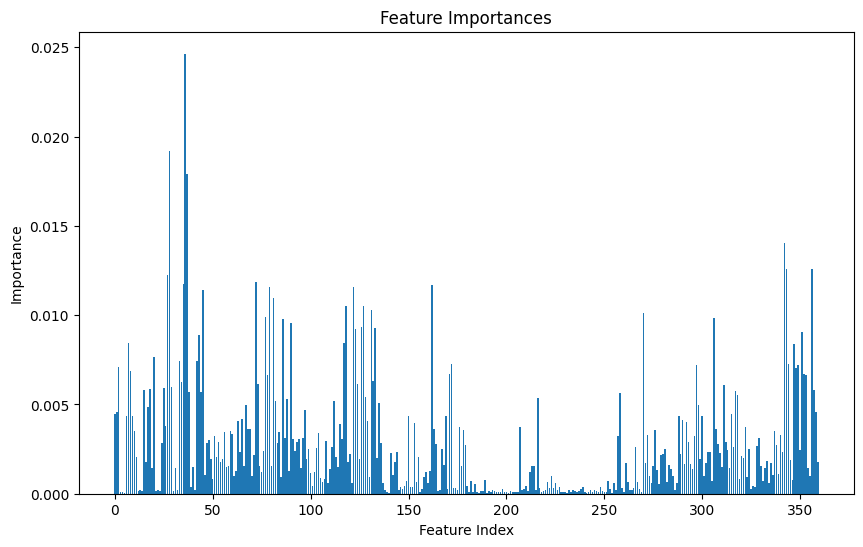

In [10]:
import matplotlib.pyplot as plt

# Feature Importance
feature_importances = rf_model.feature_importances_
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances)
plt.title("Feature Importances")
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.show()


In [11]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))


Cross-validation scores: [0.98981989 0.99295223 0.98825372 0.99216915 0.99137931]
Mean CV Accuracy: 0.9909148597197094


In [12]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid search
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)


Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validation Accuracy: 0.9906015037593985


In [13]:
# Train optimized Random Forest model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Re-train the model with best parameters
optimized_rf = RandomForestClassifier(
    max_depth=20,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=100,
    random_state=42
)
optimized_rf.fit(X_train, y_train)

# Test predictions
y_test_pred_optimized = optimized_rf.predict(X_test)

# Evaluate the optimized model
test_accuracy_optimized = accuracy_score(y_test, y_test_pred_optimized)
print("Test Accuracy (Optimized Model):", test_accuracy_optimized)

print("\nClassification Report (Optimized Model):")
print(classification_report(y_test, y_test_pred_optimized))


Test Accuracy (Optimized Model): 0.9948830409356725

Classification Report (Optimized Model):
                             precision    recall  f1-score   support

           ascending_stairs       0.99      1.00      1.00       144
         cycling_horizontal       1.00      1.00      1.00       144
           cycling_vertical       1.00      1.00      1.00       144
          descending_stairs       1.00      1.00      1.00       144
   exercising_cross_trainer       1.00      1.00      1.00       144
         exercising_stepper       1.00      1.00      1.00       144
                    jumping       1.00      1.00      1.00       144
                 lying_back       1.00      1.00      1.00       144
                lying_right       1.00      1.00      1.00       144
            moving_elevator       0.96      0.94      0.95       144
         playing_basketball       1.00      0.99      0.99       144
                     rowing       1.00      1.00      1.00       144
      ru

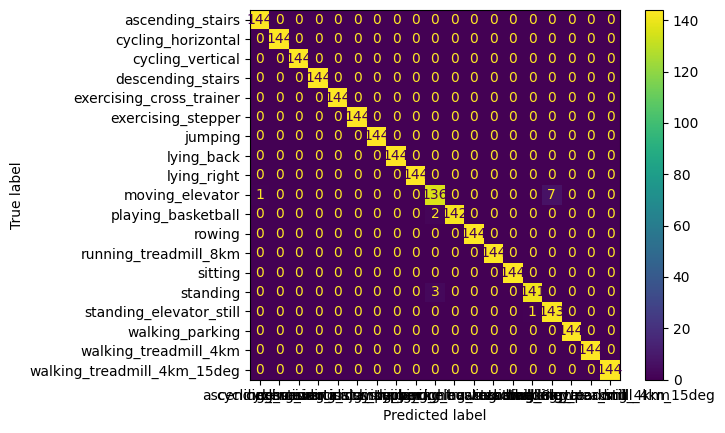

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_test_pred_optimized, labels=optimized_rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=optimized_rf.classes_)
disp.plot(cmap="viridis")
plt.show()


In [15]:
import numpy as np

# Sort feature importances in descending order
sorted_indices = np.argsort(optimized_rf.feature_importances_)[::-1]
cumulative_importance = np.cumsum(optimized_rf.feature_importances_[sorted_indices])

# Find the number of features contributing to 95% of importance
n_features = np.argmax(cumulative_importance >= 0.95) + 1
print(f"Number of features contributing to 95% importance: {n_features}")


Number of features contributing to 95% importance: 215


In [21]:
from sklearn.tree import export_graphviz
import graphviz

# Export one tree from the Random Forest
tree = optimized_rf.estimators_[0]
dot_data = export_graphviz(tree, out_file=None,
                           feature_names=[f'feature_{i}' for i in range(X_train.shape[1])],
                           class_names=optimized_rf.classes_,
                           filled=True, rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("random_forest_tree")


'random_forest_tree.pdf'

In [22]:
# Select top 215 features based on importance
top_features = sorted_indices[:215]
X_train_reduced = X_train[:, top_features]
X_test_reduced = X_test[:, top_features]

# Train Random Forest on reduced features
reduced_rf = RandomForestClassifier(max_depth=20, n_estimators=100, random_state=42)
reduced_rf.fit(X_train_reduced, y_train)

# Evaluate reduced model
y_test_pred_reduced = reduced_rf.predict(X_test_reduced)
print("Test Accuracy (Reduced Features):", accuracy_score(y_test, y_test_pred_reduced))


Test Accuracy (Reduced Features): 0.9945175438596491


In [23]:
import joblib

# Save the optimized Random Forest model
model_path = 'optimized_random_forest_model.pkl'
joblib.dump(optimized_rf, model_path)
print(f"Model saved successfully to {model_path}")


Model saved successfully to optimized_random_forest_model.pkl
